<a href="https://colab.research.google.com/github/atikahlestar/Data-Science/blob/main/Project_5_Predicting_Salary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project 5
Memprediksi Estimasi Gaji Mahasiswa Berdasarkan Gelar, Sekolah, dan Peminatan.

### Salary Dataset
    Dataset tentang informasi mahasiswa kampus (gelar, spesialisasi, dll.) dan gaji masing-masing.

### Sumber Data :
https://www.kaggle.com/datasets/benroshan/factors-affecting-campus-placement/data

### Masalah Bisnis
    Bagaimana cara meningkatkan tingkat penerimaan penawaran dengan memprediksi estimasi gaji yang akurat berdasarkan data pendidikan dan spesialisasi?

### Tujuan
    Membangun model regresi untuk memprediksi estimasi gaji

### Data Cleansing

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
file_path = '/content/drive/Shared drives/atikahlestari31/Project/Dataset/Placement_Data_Full_Class.csv'

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv(file_path)
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [5]:
df["status"].value_counts()

,count
status,
Placed,148
Not Placed,67


In [6]:
df = df[df["status"] == "Placed"]

In [7]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
7,8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.0,Mkt&Fin,62.14,Placed,252000.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148 entries, 0 to 213
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           148 non-null    int64  
 1   gender          148 non-null    object 
 2   ssc_p           148 non-null    float64
 3   ssc_b           148 non-null    object 
 4   hsc_p           148 non-null    float64
 5   hsc_b           148 non-null    object 
 6   hsc_s           148 non-null    object 
 7   degree_p        148 non-null    float64
 8   degree_t        148 non-null    object 
 9   workex          148 non-null    object 
 10  etest_p         148 non-null    float64
 11  specialisation  148 non-null    object 
 12  mba_p           148 non-null    float64
 13  status          148 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 18.5+ KB


In [9]:
## Check Missing Values

In [10]:
df.isna().sum()

,0
sl_no,0
gender,0
ssc_p,0
ssc_b,0
hsc_p,0
hsc_b,0
hsc_s,0
degree_p,0
degree_t,0
workex,0


In [11]:
## Check Outliers

In [12]:
df_num = df.select_dtypes(["int64","float64"])
col_num = df_num.columns
col_num

Index(['sl_no', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary'], dtype='object')

In [13]:
for col in col_num:
    print(f"Running for {col}")
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    fence_high = q3 + 1.5*iqr
    fence_low = q1 - 1.5*iqr
    outliers = df[(df[col] < fence_low) | (df[col] > fence_high)]
    print(outliers.shape)

Running for sl_no
(0, 15)
Running for ssc_p
(0, 15)
Running for hsc_p
(2, 15)
Running for degree_p
(3, 15)
Running for etest_p
(0, 15)
Running for mba_p
(0, 15)
Running for salary
(15, 15)


In [14]:
## Check Duplicated values

In [15]:
df.duplicated().sum()

0

### EDA

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148 entries, 0 to 213
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           148 non-null    int64  
 1   gender          148 non-null    object 
 2   ssc_p           148 non-null    float64
 3   ssc_b           148 non-null    object 
 4   hsc_p           148 non-null    float64
 5   hsc_b           148 non-null    object 
 6   hsc_s           148 non-null    object 
 7   degree_p        148 non-null    float64
 8   degree_t        148 non-null    object 
 9   workex          148 non-null    object 
 10  etest_p         148 non-null    float64
 11  specialisation  148 non-null    object 
 12  mba_p           148 non-null    float64
 13  status          148 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 18.5+ KB


In [17]:
## Univariate Analysis

In [18]:
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000
mean,106.878378,71.721486,69.926554,68.740541,73.238041,62.579392,288655.405405
std,60.682502,8.715445,9.329268,6.518087,13.729333,5.884583,93457.452420
min,1.000000,49.000000,50.830000,56.000000,50.000000,52.380000,200000.000000
25%,57.750000,65.000000,63.000000,65.000000,60.000000,57.772500,240000.000000
50%,108.500000,72.500000,68.000000,68.000000,72.000000,62.245000,265000.000000
75%,153.250000,78.125000,75.250000,72.422500,85.000000,66.760000,300000.000000
max,214.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [19]:
col_num

Index(['sl_no', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary'], dtype='object')

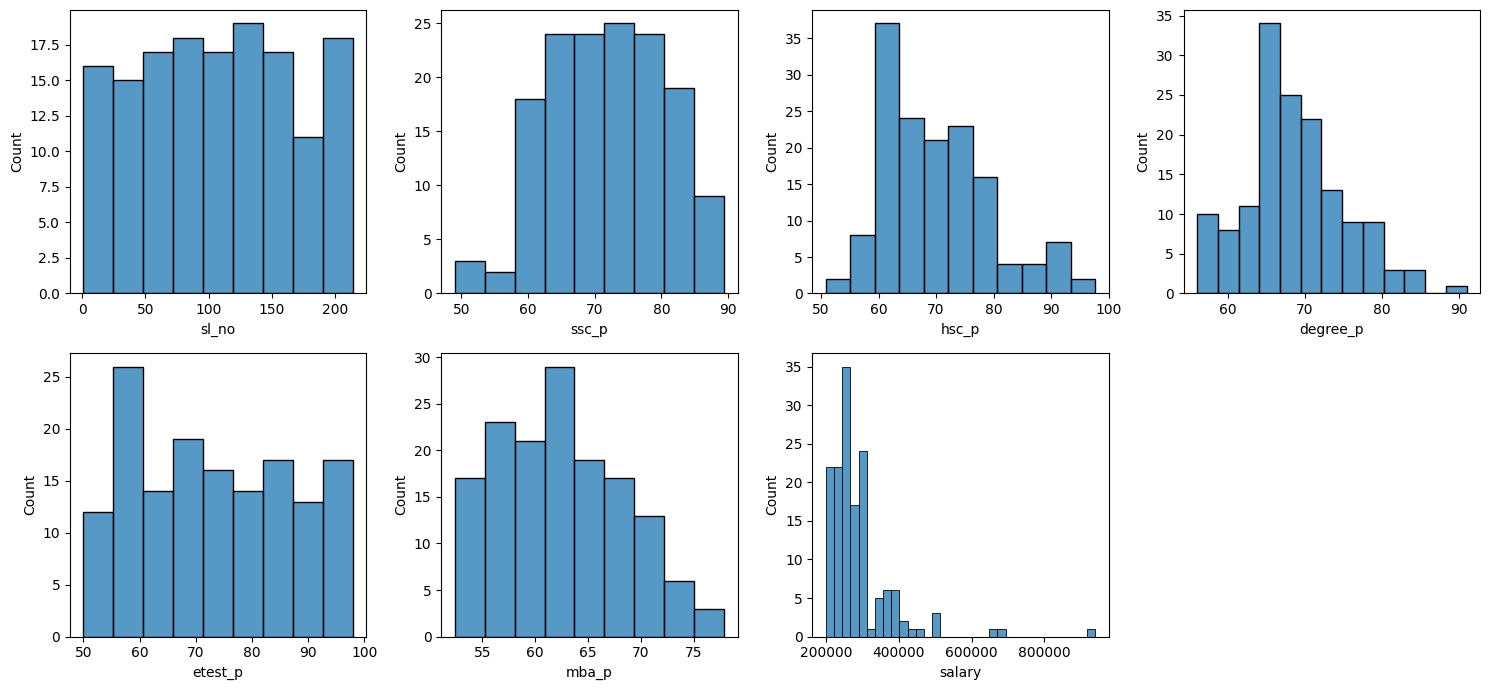

In [20]:
plt.figure(figsize = (15,7))
for i in range(len(col_num)):
    plt.subplot(2,4,i+1)
    sns.histplot(x = col_num[i], data = df)
    plt.tight_layout()

In [21]:
## Multivariate Analysis

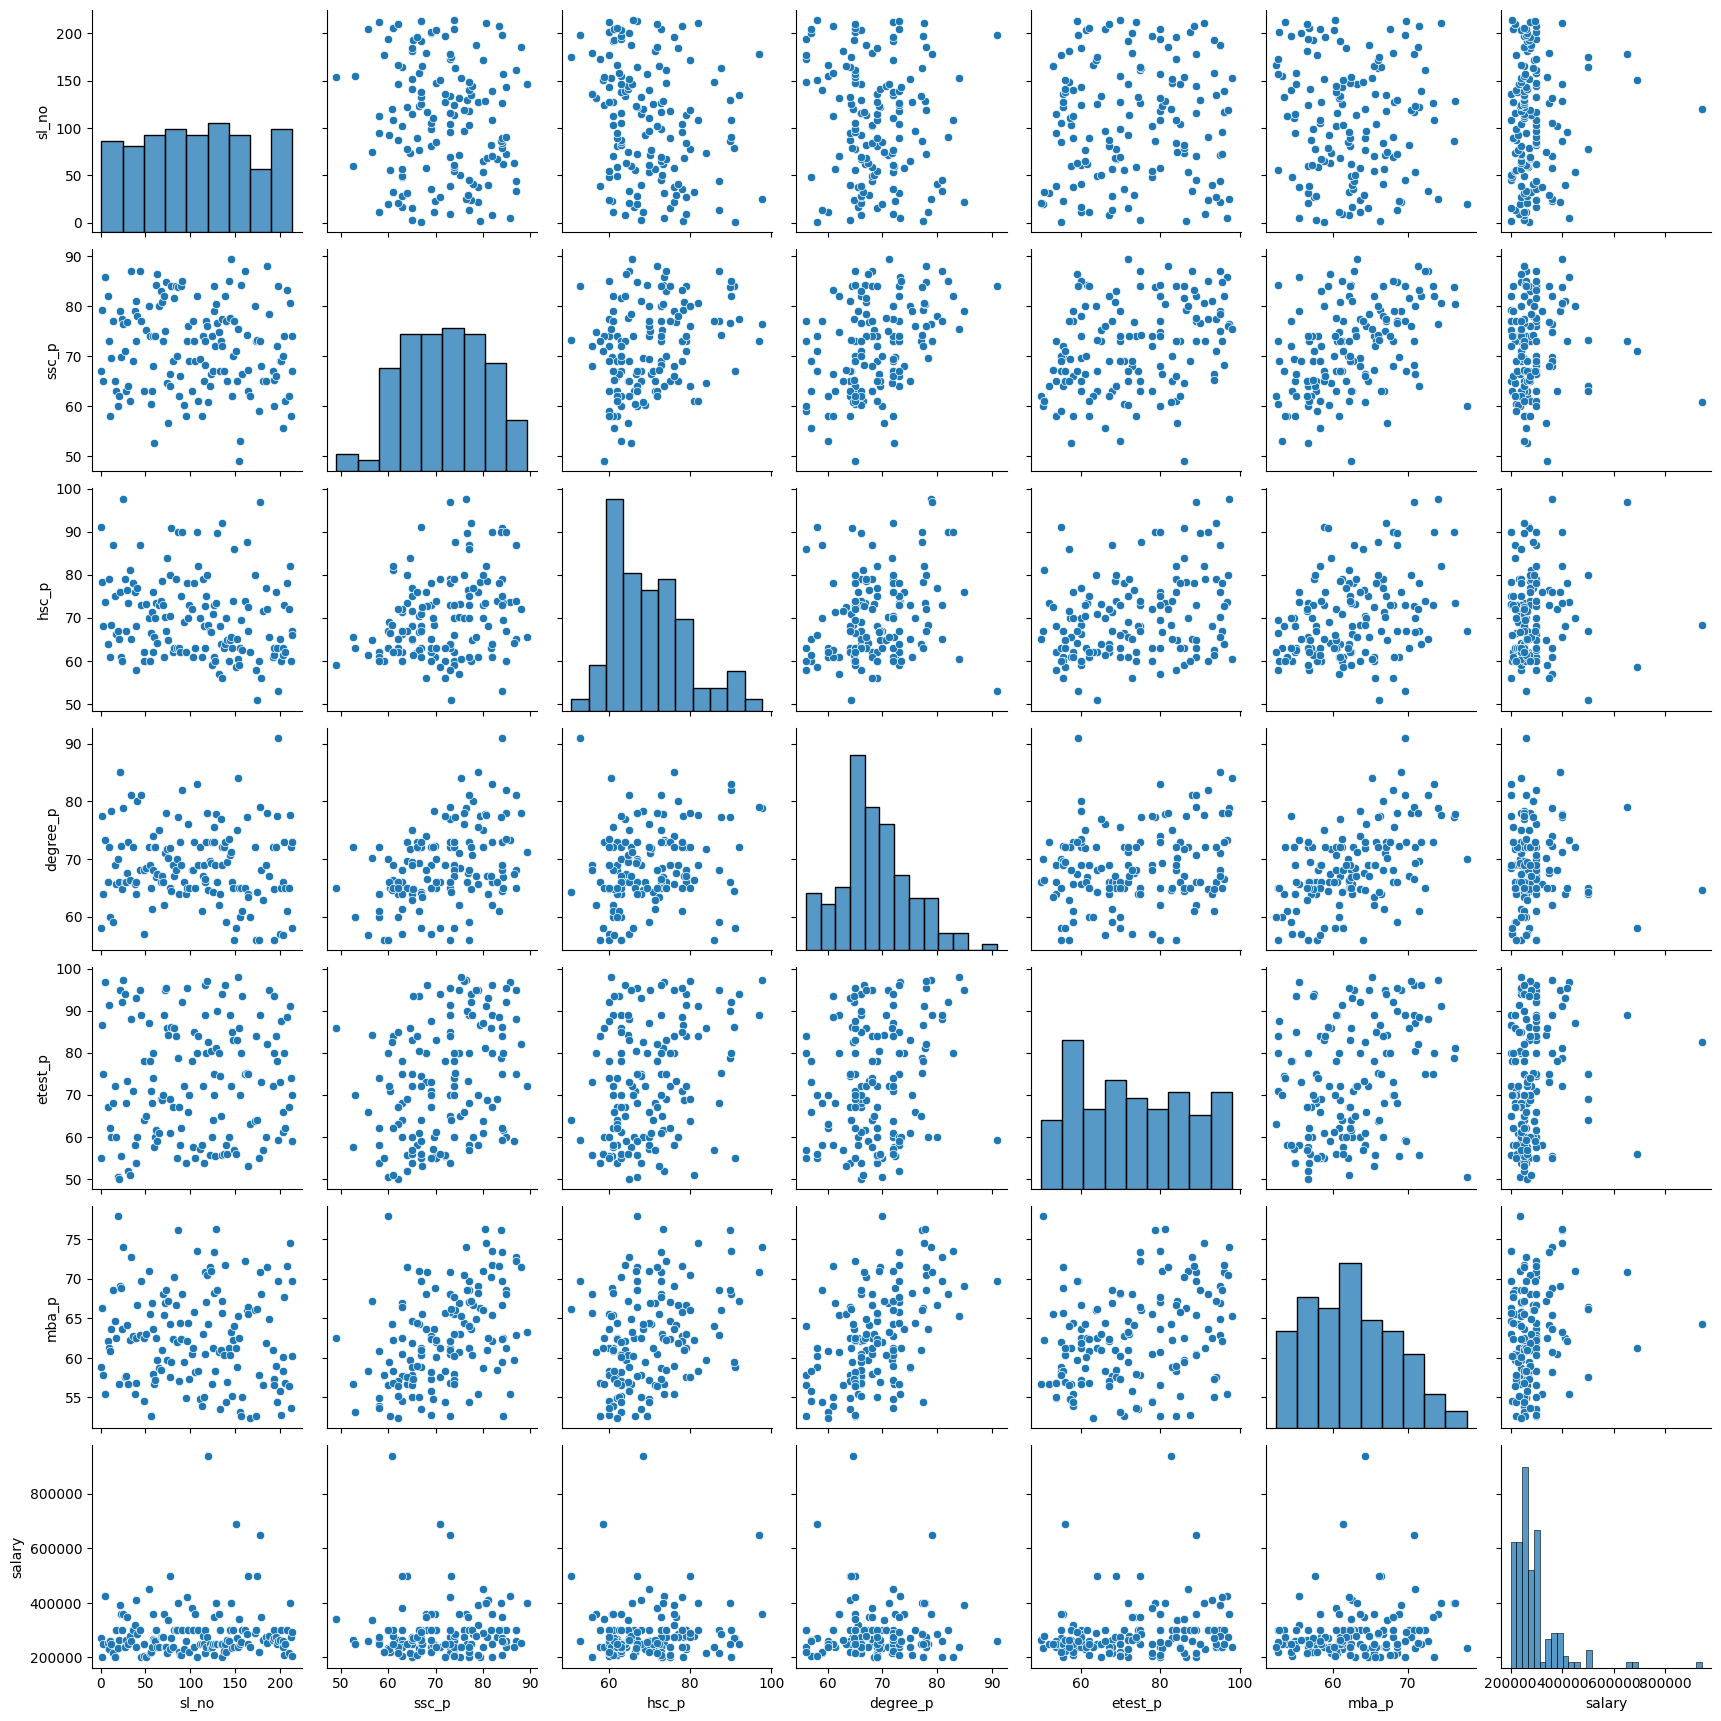

In [22]:
sns.pairplot(df[col_num])

<Axes: >

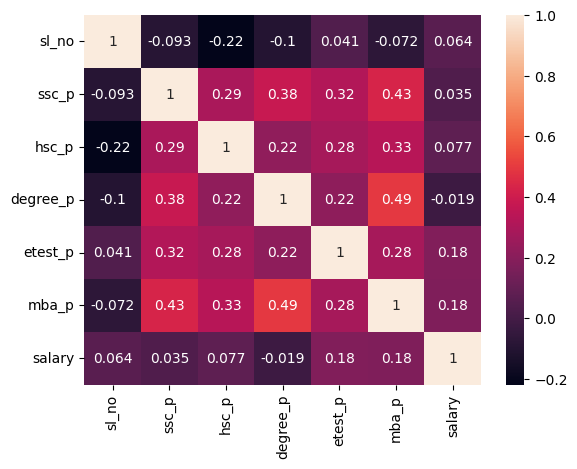

In [23]:
sns.heatmap(df[col_num].corr(), annot = True)

### Additional Data Preparation before Modeling


In [24]:
## Feature Engineering

In [25]:
df["ssc_to_ssc_p"] = df["hsc_p"]/ df["ssc_p"]
df["hsc_to_degree_p"] = df["degree_p"]/ df["hsc_p"]
df["degree_to_mba_p"] = df["mba_p"] / df["degree_p"]

In [26]:
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,ssc_to_ssc_p,hsc_to_degree_p,degree_to_mba_p
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0,1.358209,0.637363,1.013793
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0,0.987394,0.989148,0.855447
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0,1.046154,0.941176,0.903125
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0,0.857809,0.995924,0.757162
7,8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.0,Mkt&Fin,62.14,Placed,252000.0,0.780488,1.031250,0.941515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,210,M,62.00,Central,72.00,Central,Commerce,65.00,Comm&Mgmt,No,67.0,Mkt&Fin,56.49,Placed,216000.0,1.161290,0.902778,0.869077
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0,1.017370,0.946341,0.959923
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0,1.034483,1.200000,0.744722
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0,1.000000,1.089552,0.955068


In [27]:
## One Hot Encoding

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148 entries, 0 to 213
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sl_no            148 non-null    int64  
 1   gender           148 non-null    object 
 2   ssc_p            148 non-null    float64
 3   ssc_b            148 non-null    object 
 4   hsc_p            148 non-null    float64
 5   hsc_b            148 non-null    object 
 6   hsc_s            148 non-null    object 
 7   degree_p         148 non-null    float64
 8   degree_t         148 non-null    object 
 9   workex           148 non-null    object 
 10  etest_p          148 non-null    float64
 11  specialisation   148 non-null    object 
 12  mba_p            148 non-null    float64
 13  status           148 non-null    object 
 14  salary           148 non-null    float64
 15  ssc_to_ssc_p     148 non-null    float64
 16  hsc_to_degree_p  148 non-null    float64
 17  degree_to_mba_p  148 

In [29]:
df = df.drop(columns = ["sl_no"])
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,ssc_to_ssc_p,hsc_to_degree_p,degree_to_mba_p
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0,1.358209,0.637363,1.013793
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0,0.987394,0.989148,0.855447
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0,1.046154,0.941176,0.903125
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0,0.857809,0.995924,0.757162
7,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.0,Mkt&Fin,62.14,Placed,252000.0,0.780488,1.031250,0.941515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,M,62.00,Central,72.00,Central,Commerce,65.00,Comm&Mgmt,No,67.0,Mkt&Fin,56.49,Placed,216000.0,1.161290,0.902778,0.869077
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0,1.017370,0.946341,0.959923
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0,1.034483,1.200000,0.744722
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0,1.000000,1.089552,0.955068


In [30]:
df = pd.get_dummies(df)
df

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,ssc_to_ssc_p,hsc_to_degree_p,degree_to_mba_p,gender_F,...,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR,status_Placed
0,67.00,91.00,58.00,55.0,58.80,270000.0,1.358209,0.637363,1.013793,False,...,True,False,False,False,True,True,False,False,True,True
1,79.33,78.33,77.48,86.5,66.28,200000.0,0.987394,0.989148,0.855447,False,...,False,True,False,False,True,False,True,True,False,True
2,65.00,68.00,64.00,75.0,57.80,250000.0,1.046154,0.941176,0.903125,False,...,False,False,True,False,False,True,False,True,False,True
4,85.80,73.60,73.30,96.8,55.50,425000.0,0.857809,0.995924,0.757162,False,...,True,False,True,False,False,True,False,True,False,True
7,82.00,64.00,66.00,67.0,62.14,252000.0,0.780488,1.031250,0.941515,False,...,False,True,False,False,True,False,True,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,62.00,72.00,65.00,67.0,56.49,216000.0,1.161290,0.902778,0.869077,False,...,True,False,True,False,False,True,False,True,False,True
210,80.60,82.00,77.60,91.0,74.49,400000.0,1.017370,0.946341,0.959923,False,...,True,False,True,False,False,True,False,True,False,True
211,58.00,60.00,72.00,74.0,53.62,275000.0,1.034483,1.200000,0.744722,False,...,False,True,False,False,True,True,False,True,False,True
212,67.00,67.00,73.00,59.0,69.72,295000.0,1.000000,1.089552,0.955068,False,...,True,False,True,False,False,False,True,True,False,True


In [31]:
## Train Test Split

In [32]:
X = df.drop(columns= ["salary"])
y = df["salary"]

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 , random_state = 1)

In [34]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(118, 25)
(30, 25)
(118,)
(30,)


### Modeling

In [35]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

### Evaluation

In [36]:
y_lr = lr.predict(X_test)
y_lr

array([282612.5737008 , 261351.75792851, 296479.80035096, 251538.35233134,
       340426.00091243, 221537.38634981, 189171.75651528, 293368.39500518,
       202995.50337831, 312955.37899522, 316812.1091017 , 349016.47283104,
       355859.45057844, 268535.1973425 , 306332.99352571, 308871.23596519,
       281086.2997886 , 308182.27621871, 335999.02092243, 212681.38400116,
       300235.00399608, 281179.8849337 , 301766.33068085, 278972.50954578,
       332350.08955624, 306121.43780596, 358654.52926612, 328191.74491604,
       305517.43994772, 379064.84569675])

In [37]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_lr)

71386.02011149056

In [38]:
import numpy as np
print(np.mean(y_test))
print(np.std(y_test))

292266.6666666667
77906.75338006472


In [39]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_lr)
rmse = np.sqrt(mse)

print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 83846.43567677512


In [40]:
from sklearn.metrics import r2_score

r2_score(y_test, y_lr)

-0.1582945108315701

In [41]:
y_lr

array([282612.5737008 , 261351.75792851, 296479.80035096, 251538.35233134,
       340426.00091243, 221537.38634981, 189171.75651528, 293368.39500518,
       202995.50337831, 312955.37899522, 316812.1091017 , 349016.47283104,
       355859.45057844, 268535.1973425 , 306332.99352571, 308871.23596519,
       281086.2997886 , 308182.27621871, 335999.02092243, 212681.38400116,
       300235.00399608, 281179.8849337 , 301766.33068085, 278972.50954578,
       332350.08955624, 306121.43780596, 358654.52926612, 328191.74491604,
       305517.43994772, 379064.84569675])

In [42]:
diff = y_test - y_lr

In [43]:
prediction_threshold = [x for x in diff if (x < 77906.75338006472) and (x > -77906.75338006472)]

In [44]:
len(prediction_threshold)

15

### Kesimpulan Bisnis

#### Dampak Bisnis

In [45]:
# Final Model = Linear Regression
# MAE = 71386, RMSE = 83846

# Asumsikan dari setiap 100 pelamar

# Sebelum model:
    # Kita tidak tahu estimasi gaji yang akurat yang seharusnya diberikan.
    # Hanya 25% yang diterima, yaitu 25 pelamar.

# Setelah model:
    # Kita mengetahui estimasi gaji yang akurat dan mendekati pasar.
    # Diasumsikan estimasi gaji yang akurat adalah yang memiliki perbedaan kecil.
    # 15/30 = 50% dari semua gaji dianggap akurat.
    # Tingkat penerimaan akan menjadi 50%, yaitu 50 pelamar.